# Restricted Boltzmann Machine (RBM) with sequential training

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

In [12]:
class RBM:
    def __init__(self, n_visible: int, n_hidden: int, learning_rate: float=0.1):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.weights = np.random.normal(0, 0.01, size=(n_visible, n_hidden))
        self.v_bias = np.zeros(n_visible)
        self.h_bias = np.zeros(n_hidden)

    def sigmoid(self, x: NDArray[np.float64]):
        return 1 / (1 + np.exp(-x))

    def train_pattern(self, pattern: NDArray[np.float64], k: int=1, epochs: int=5):
        for _ in range(epochs):
            v = pattern
            h_prob: NDArray[np.float64] = np.array([])
            v_sample: NDArray[np.int64] = np.array([])
            for _ in range(k):  # Contrastive Divergence (CD-k)
                h_prob = self.sigmoid(np.dot(v, self.weights) + self.h_bias)
                h_sample = np.random.binomial(1, h_prob)
                v_prob: NDArray[np.float64] = self.sigmoid(np.dot(h_sample, self.weights.T) + self.v_bias)
                v_sample: NDArray[np.int64] = np.random.binomial(1, v_prob)
            # Update weights
            pos_grad = np.outer(pattern, h_prob)
            neg_grad = np.outer(v_sample, self.sigmoid(np.dot(v_sample, self.weights) + self.h_bias))

            self.weights += self.learning_rate * (pos_grad - neg_grad)
            self.v_bias += self.learning_rate * (pattern - v_sample)
            self.h_bias += self.learning_rate * (h_prob - self.sigmoid(np.dot(v_sample, self.weights) + self.h_bias))

    def reconstruct(self, pattern: NDArray[np.float64]):
        h = self.sigmoid(np.dot(pattern, self.weights) + self.h_bias)
        v = self.sigmoid(np.dot(h, self.weights.T) + self.v_bias)
        return (v > 0.5).astype(int)

In [13]:
def plot_patterns(patterns: list[NDArray[np.int64]], title: str):
    _, axes = plt.subplots(1, len(patterns))
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern.reshape(8, 8), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

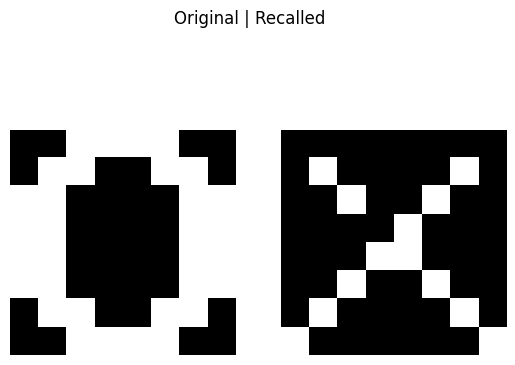

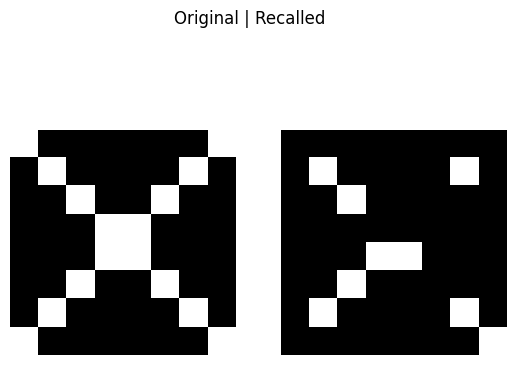

In [14]:
# Define 2 binary patterns
pattern_0 = np.array([
    [0,0,1,1,1,1,0,0],
    [0,1,1,0,0,1,1,0],
    [1,1,0,0,0,0,1,1],
    [1,1,0,0,0,0,1,1],
    [1,1,0,0,0,0,1,1],
    [1,1,0,0,0,0,1,1],
    [0,1,1,0,0,1,1,0],
    [0,0,1,1,1,1,0,0]
]).flatten()

pattern_1 = np.array([
    [1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,1,0],
    [0,0,1,0,0,1,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,1,0,0,1,0,0],
    [0,1,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,1]
]).flatten()

rbm = RBM(n_visible=64, n_hidden=32)

# Sequential training
rbm.train_pattern(pattern_0, k=1)
rbm.train_pattern(pattern_1, k=1)  # more recent

# Test both
recon_0 = rbm.reconstruct(pattern_0)
recon_1 = rbm.reconstruct(pattern_1)

# Visualization
plot_patterns([pattern_0, recon_0], title="Original | Recalled")
plot_patterns([pattern_1, recon_1], title="Original | Recalled")